In [1]:
'''
 문) iris dataset 이용하여 다음과 같은 단계로 XGBoost model을 생성하시오.
'''

import pandas as pd
from xgboost import XGBClassifier # model
from xgboost import plot_importance # 중요변수(x) 시각화  

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report 
import matplotlib.pyplot as plt

# 1. data set load 
iris = pd.read_csv("C:/Users/hyebin/Desktop/Python_ML/data/iris.csv")

cols=list(iris.columns)
col_x=cols[:4] # 1칼럼 추출(제거)
col_y=cols[-1] 

print('y변수 : ', col_y) # y변수   
print("x변수 개수:",len(col_x)) # x변수 

y변수 :  Species
x변수 개수: 4


In [2]:
# 2. 훈련/검정 데이터셋 생성
train_set, test_set = train_test_split(iris, test_size=0.25)

In [4]:
# XGBOOST
#help(XGBClassifier) # objective='binary:logistic'
'''
binary:logistic: 이진 분류, 출력 확률에 대한 로지스틱 회귀
multi:softmax: softmax 사용하여 여러 클래스 분류(num_class (클래스 수) 설정해야 함)
'''

# 3. model 생성 
XGB = XGBClassifier()
# train data 이용 model 생성 
model = XGB.fit(train_set[col_x], train_set[col_y])
#print('XGB model =',model) # refined_XGB= XGBClassifier()

[02:21:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [6]:
# 4. 예측치 생성 : test data 이용  
pred = model.predict(test_set[col_x]) # 검증데이터

# 5. fscore 중요변수 확인 & 시각화  
fscore = model.get_booster().get_fscore()
print("fscore:",fscore) 
# fscore: {'Petal.Length': 285, 'Petal.Width': 92, 'Sepal.Length': 64, 'Sepal.Width': 38}
print('len =', len(fscore)) 

fscore: {'Petal.Length': 121, 'Sepal.Width': 34, 'Petal.Width': 70, 'Sepal.Length': 80}
len = 4


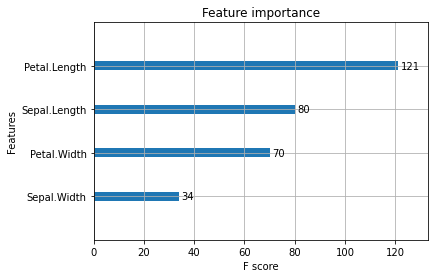

In [7]:
# 중요변수 시각화
plot_importance(model) # fscore 기준  내림차순 52변수 시각화 
plt.show()


In [9]:
# 6. model 평가 : confusion matrix, accuracy, report
mat = confusion_matrix(test_set[col_y], pred)
print(mat)
print()
# 모델 평가 
acc = accuracy_score(test_set[col_y], pred)
print('분류정확도 =', acc)

report = classification_report(test_set[col_y], pred)
print('모델 평가 결과')
print(report)

[[15  0  0]
 [ 0  9  1]
 [ 0  1 12]]

분류정확도 = 0.9473684210526315
모델 평가 결과
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        15
  versicolor       0.90      0.90      0.90        10
   virginica       0.92      0.92      0.92        13

    accuracy                           0.95        38
   macro avg       0.94      0.94      0.94        38
weighted avg       0.95      0.95      0.95        38

